In [42]:
import networkx as nx  # https://networkx.github.io/documentation/networkx-1.11/reference/introduction.html
import matplotlib.pyplot as plt
import numpy as np
from queue import Queue

# Graph Theory

## Search functions

In [84]:
def bfs(G, s):
    """
    This is a breadth first search algorithm that will return the distance of all of the vertices from the start vertex s. 
    
    Input:
    G -- The input graph
    s -- The start vertex
    
    Return: 
    dist -- a distance vector of each vertex from the start vertex s
    
    """
    
    dist = {}
    
    for v in G:
        dist[v] = np.inf
    
    dist[s] = 0  # initalize start vertex distance to 0
    
    q = Queue()
    q.put(s)
    
    while not q.empty():
        u = q.get()
        for v in nx.all_neighbors(G, u):
            if np.isinf(dist[v]):
                q.put(v)
                dist[v] = dist[u] + 1
    
    return dist

In [86]:
def dijkstras(G, l, s):
    pass

In [127]:
def dfs(G):
    """
    This is a depth first search algorithm that will return the pre/post orderings of all of the nodes within the graph. 
    
    Input:
    G -- The input graph
    s -- The start vertex
    
    Return: 
    ordering -- the pre/post ordering of all of the discoverable graph vertices from start vertex s 
    
    """
    visited = {}
    ordering = {}
    c = 0
    
    for v in G:
        visited[v] = False
        ordering[v] = (0,0)  # initialize to empty tuple for the (pre,post) ordering
        
    for v in G:
        if not visited[v]:
            explore(G, v, visited, ordering, c)
    
    print(ordering)
    

def explore(G, v, visited, ordering, c):
    """
    The recursive explore method that explores all of the reachable nodes from a given start. 
    
    Input:
    G -- The input graph
    s -- The start vertex
    
    Return:
    c -- the clock num tracking used for the pre/post visits
    
    
    """
    visited[v] = True
    c += 1
    ordering[v] = (c, ordering[v][1])  # update previst
    
    for u in nx.all_neighbors(G, v): 
        if not visited[u]:
            c = explore(G, u, visited, ordering, c)
    
    c += 1
    ordering[v] = (ordering[v][0], c)  # update postvist
    return c

## Utility functions

In [138]:
def reverse_graph(G):
    G_prime = nx.DiGraph()
    elist = []
    
    
    for e in G.edges():
        elist.append((e[1], e[0]))
    
    G_prime.add_edges_from(elist)
    return G_prime

## Figures

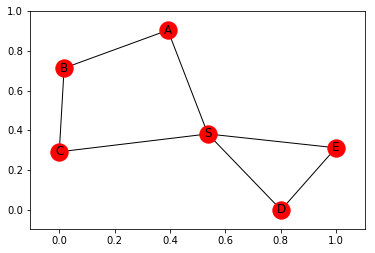

In [17]:
# Figure 4.1 in DPV Algorithms
G = nx.Graph()
elist = [('E', 'S'), ('E', 'D'), ('S', 'D'), ('S', 'C'), ('S', 'A'), ('A', 'B'), ('B', 'C')]
G.add_edges_from(elist)
nx.draw_networkx(G, with_labels=True)
plt.show()

In [83]:
print(bfs(G, 'S'))

{'E': 1, 'S': 0, 'D': 1, 'C': 1, 'A': 1, 'B': 2}


In [126]:
dfs(G)

{'E': (1, 12), 'S': (2, 11), 'D': (3, 4), 'C': (5, 10), 'A': (7, 8), 'B': (6, 9)}


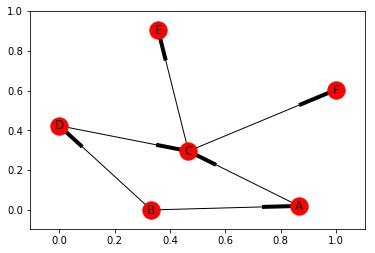

In [136]:
# Figure 3.8 in DPV Algorithms
G = nx.DiGraph()
elist = [('B', 'A'), ('B', 'D'), ('A', 'C'), ('D', 'C'), ('C', 'F'), ('C', 'E')]
G.add_edges_from(elist)
nx.draw_networkx(G, with_labels=True)
plt.show()

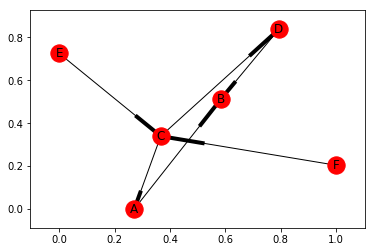

In [141]:
reverse = reverse_graph(G)
nx.draw_networkx(reverse, with_labels=True)
plt.show()